In [ ]:
#M3-1 Anne Cloutier Vetiver 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [ ]:
#dot product test on example for trial run

import numpy as np

A = [ [1,2,3], [4,5,6] ]
B = [ [1,2,3], [4,5,6], [7,8,9] ]

C = np.dot(A,B)
print(C)

[[30 36 42]
 [66 81 96]]


In [ ]:
#write for loop multiplying row vector with column vector

def dotprod(A, B):
    #create dict for result
    matrix = [] 

    for i in range(len(A)):

        row = [] # the new row in new matrix
        for j in range(len(B[0])):

            product = 0
            # the new element in the new row

            for v in range(len(A[i])):
                 product += A[i][v] * B[v][j]
            row.append(product) # append sum of product into the new row

        matrix.append(row) # append the new row into the final result
    return matrix

A = np.array([[1,2,3]])
B = np.array([[1],[4],[7]])

In [ ]:
dotprod(A,B)

[[30]]

# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

  	  	$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

In [ ]:
"""
#Give a 3 examples of non-invertible square matrices that are non-zero
2.1 a.
Any matrix whose number of rows and columns do not match. 
Suppose  𝑀  is an invertible  𝑚×𝑛  matrix where  𝑚≠𝑛 , for contradiction.
Then  𝑁  must be a  𝑛×𝑚  matrix, otherwise one of  𝑀𝑁  or  𝑁𝑀  would not exist.
So  𝐼  is an  𝑚×𝑚  matrix in the equality  𝑀𝑁=𝐼 , and an  𝑛×𝑛  matrix in the equality
𝑁𝑀=𝐼 . Let  𝑝  be the smaller of  𝑚  and  𝑛 , so that  𝑀  has rank at most  𝑝 ,
and hence, so do the matrices  𝑀𝑁  and  𝑁𝑀 . This is impossible because
𝑀𝑁=𝐼  has rank  𝑚  and  𝑁𝑀=𝐼  has rank  𝑛  - implying that  𝑝=𝑚=𝑛  after all.

2.1 b. From the previous point, a matrix is invertible
if it is a square matrix of full rank. This is also a sufficient condition.
Thus, any square matrix that does not have full rank is non-invertible

2.1 c Any diagonal matrix having at least one diagonal entry
equal to zero is non-invertible.
"""

In [ ]:
"""2.2 An identity matrix is necessarily invertible. 
Its entries on the diagonal from the upper left to the
bottom right are all 1's and all the other entries are 0's.  

If it were not square and with only 1's
on the diagonal, it would not be invertible."""

In [ ]:
"""2.3 The trace is commutative for two matrices so  𝑡𝑟(𝐴𝐵)=𝑡𝑟(𝐵𝐴) . Give an example where this is false
 for 3 matrices which can all be multiplied together."""
 #A = 0  1  #B = 0  0   #AB = 1  0
#     0  0       1  0         0  0
 
 #tr(AB) = 1 (not equal to) 0. 0 = tr(A)tr(B)
 # tr(AB) = tr(BA)

In [ ]:
#Give an example of a nonzero  4×4  idempotent matrix (where  𝐴⋅𝐴=𝐴2=𝐴 )
#Since an identity matrix is necessarily idempotent, here is a simple example:

#1 0 0 0
#0 1 0 0
#0 0 1 0
#0 0 0 1

In [ ]:
import numpy as np
from numpy.linalg import lapack_lite, _umath_linalg
from numpy.linalg import solve

#2.5solve the following system of equations for x, y and z
# using matrices and numpy.linalg.solve
#𝑥+𝑦+𝑧=6
#2y 	+ 	5z 	= 	−4$$
#2𝑥+5𝑦−𝑧=27 

a = np.array([[1,1,1], [0,2,5 ], [2 ,5,-1]])
b = np.array([ 6,-4, 27])
x = np.linalg.solve (a,b)
x


array([ 5.,  3., -2.])

# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [ ]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import statsmodels.api as sm

In [ ]:
# load data from sklearn.datasets import load_boston
boston = load_boston()

#generate dataframe
df = pd.DataFrame(boston.data)

#name columns with feature_names key
df.columns = boston.feature_names

#fetch the Median Value and add as data column 
#as the median house price is will be the dependent variable
df['MEDV'] = pd.DataFrame(boston.target)
df.shape

(506, 14)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
#B.2 Check for null values
#replace 0 values with np.nan values to ensure that null or missing data does not torque results
df.replace({0:np.nan})


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,NaN,7.07,NaN,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,NaN,7.07,NaN,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,NaN,2.18,NaN,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,NaN,2.18,NaN,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,NaN,11.93,NaN,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,NaN,11.93,NaN,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,NaN,11.93,NaN,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,NaN,11.93,NaN,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
#drop ZN and CHAS columns from this analysis so they don't twist results. why?
#a. CHAS is a really a numeric version of a Boolean column(1=True, 0=False).
#It can be reintegrated for another analysis
#to verify other hypotheses
#b ZN is an outliser
df2 = df.drop(['ZN', 'CHAS'], axis=1)
df2

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
df2.dropna(how='any',axis=0)

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
#check again for null values in the entire dataframe
df2.isnull().sum()

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
#Alright! now I can keep moving along

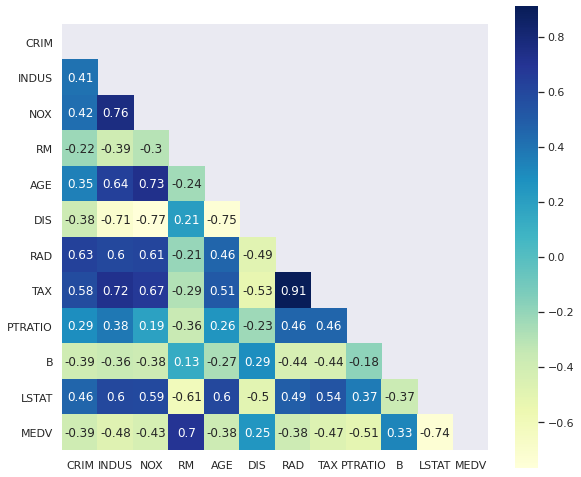

In [ ]:
#Identify the strongest independent variables (X) and cut off high correlations(+-.75)
#which may drive the dependent (y - MEDV)
#limit false correlation
mask = np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)] = True

# How to remove redundant correlation
# <https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib>

sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(df2.corr().round(2), square=True, cmap='YlGnBu', annot=True, mask=mask);

# vmax emphasizes a color based on the gradient that you chose
# cmap is the color scheme of the heatmap
# square shapes the heatmap to a square for neatness
# annot shows the individual correlations of each pair of values
# mask removes redundacy and prevents repeat of the correlation values

In [ ]:
# highest correlation for MEDV median house value are
#taking the 2 highst positives and 2 lowest negatives:
# 1 RM = number of rooms (.7)
# 2 B = (.33) higher population diversity
# 3 PTRATIO (-0.51) = high pupil to teacher ration
# 4  LSTAT = (-0.74) where % of poor population is lowest

In [ ]:
#drop highest correlated values
#TAX & RAD = .91, NOX and INDUS = .76, DIS and NOX = -.77
columns = ['TAX', 'RAD', 'NOX', 'INDUS', 'DIS']
df3 = df2.drop(columns = columns)
df3.head(10)

,CRIM,RM,AGE,PTRATIO,B,LSTAT,MEDV
0,0.00632,6.575,65.2,15.3,396.90,4.98,24.0
1,0.02731,6.421,78.9,17.8,396.90,9.14,21.6
2,0.02729,7.185,61.1,17.8,392.83,4.03,34.7
3,0.03237,6.998,45.8,18.7,394.63,2.94,33.4
4,0.06905,7.147,54.2,18.7,396.90,5.33,36.2
5,0.02985,6.430,58.7,18.7,394.12,5.21,28.7
6,0.08829,6.012,66.6,15.2,395.60,12.43,22.9
7,0.14455,6.172,96.1,15.2,396.90,19.15,27.1
8,0.21124,5.631,100.0,15.2,386.63,29.93,16.5
9,0.17004,6.004,85.9,15.2,386.71,17.10,18.9


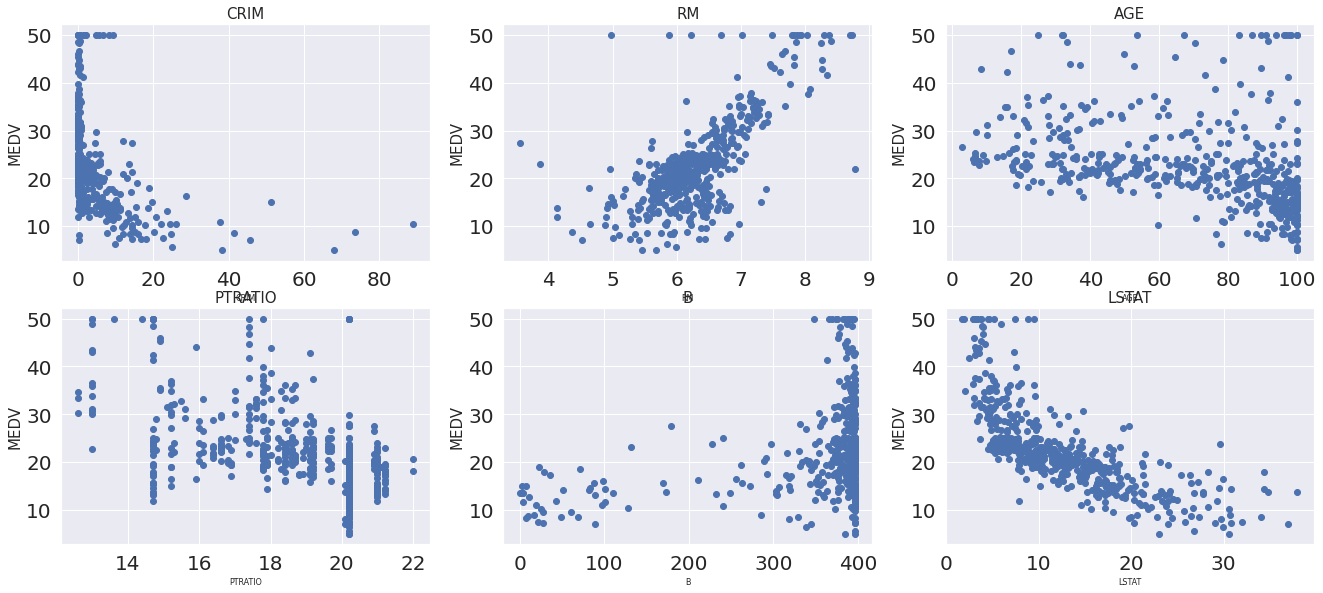

In [ ]:
# Create multiple plots to check for best fit
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

features = df3.drop('MEDV', 1).columns
target = df3['MEDV']
plt.figure(figsize=(20,20))

for index, feature_name in enumerate(features):
    # 4 rows of plots, 13/3 == 4 plots per row, index+1 where the plot begins
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(df3[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8) #Removed for easier view of plots
    plt.ylabel('MEDV', fontsize=15)

In [ ]:
#linear relationships are most obvious with:
#RM : the greater the number of rooms, the higher the value
#LSAT : % lower status of the population (negative)

In [ ]:
import numpy as np
df3["LOGLSTAT"] = df3["LSTAT"].apply(np.log)

In [ ]:
#Starting the regression per say
#create list of features and variables
#using LOG on LSTAT because it's a negative slope
X = df3[['LOGLSTAT', 'RM']]
y = df3.MEDV

In [ ]:
## create train test split data. We need the training set to teach our model
#about the true values and then we’ll use what it learned to predict our prices.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

#random_state 10 for consistent data to train/test

print(X_train.shape) # 339 rows 6 features
print(X_test.shape) # 167 rows 6 features
print(y_train.shape) # 339 rows 1 feature
print(y_test.shape) # 167 rows 1 feature


(339, 2)
(167, 2)
(339,)
(167,)


In [ ]:
#Create a Linear Regression object, 
#fit the training data and then predict.

from sklearn.linear_model import LinearRegression

# Create LinearRegression Instance
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, y_train)

# Predict
y_predicted = lrm.predict(X_test)

In [ ]:
#Evaluate model

from sklearn.metrics import mean_squared_error
def linear_metrics():
    r2 = lrm.score(X_test, y_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_predicted)))
    print('r-squared: {}'.format(r2))
    print('---------------------------------------')
    print('root mean squared error: {}'.format(rmse))
linear_metrics()

#r-squared = .65 which means that the model is more than acceptable
#mean squared error = real prices are 5.7K above predictions

r-squared: 0.7155988559379332
---------------------------------------
root mean squared error: 5.214330262011093


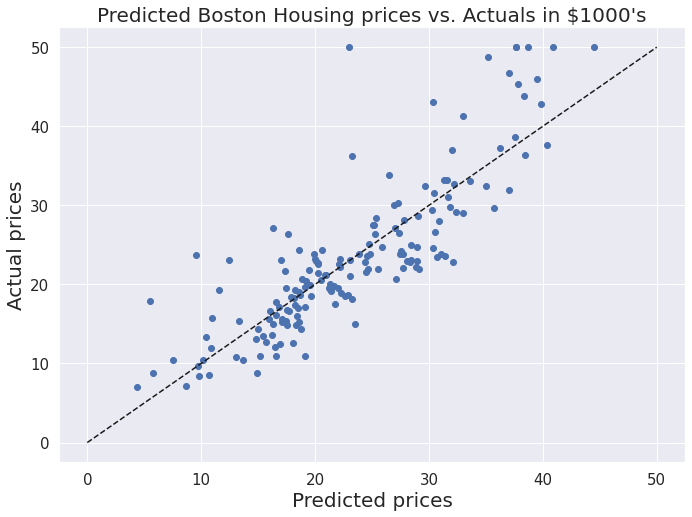

In [ ]:
#Plot predictions vs actual

plt.figure(figsize=(10,8))
plt.scatter(y_predicted, y_test)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Actual prices', fontsize=20);


plt.xlabel('Predicted prices', fontsize=20);
plt.title("Predicted Boston Housing prices vs. Actuals in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [ ]:
# Use OLS to see what the BIC value is
X = df3[['LOGLSTAT', 'RM']]
y = df3.MEDV

est = sm.OLS(y, sm.add_constant(x)).fit()
est.summary()


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1708: RuntimeWarning: divide by zero encountered in double_scalars
  return self.mse_model/self.mse_resid
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:46: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:54:34   Log-Likelihood:                    inf
No. Observations:                 506   AIC:                              -inf
Df Residuals:                     504   BIC:                              -inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e-17          0       -inf      0.000   -2.78e-17   -2.78e-17
MEDV           1.0000          0        inf      0.000       1.000       1.000
==============================================================================
Omnibus:                     1483.476   Durbin-Watson:                     nan
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.750
Skew:                           0.000   Prob(JB):                     6.26e-42
Kurtosis:                       0.000   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

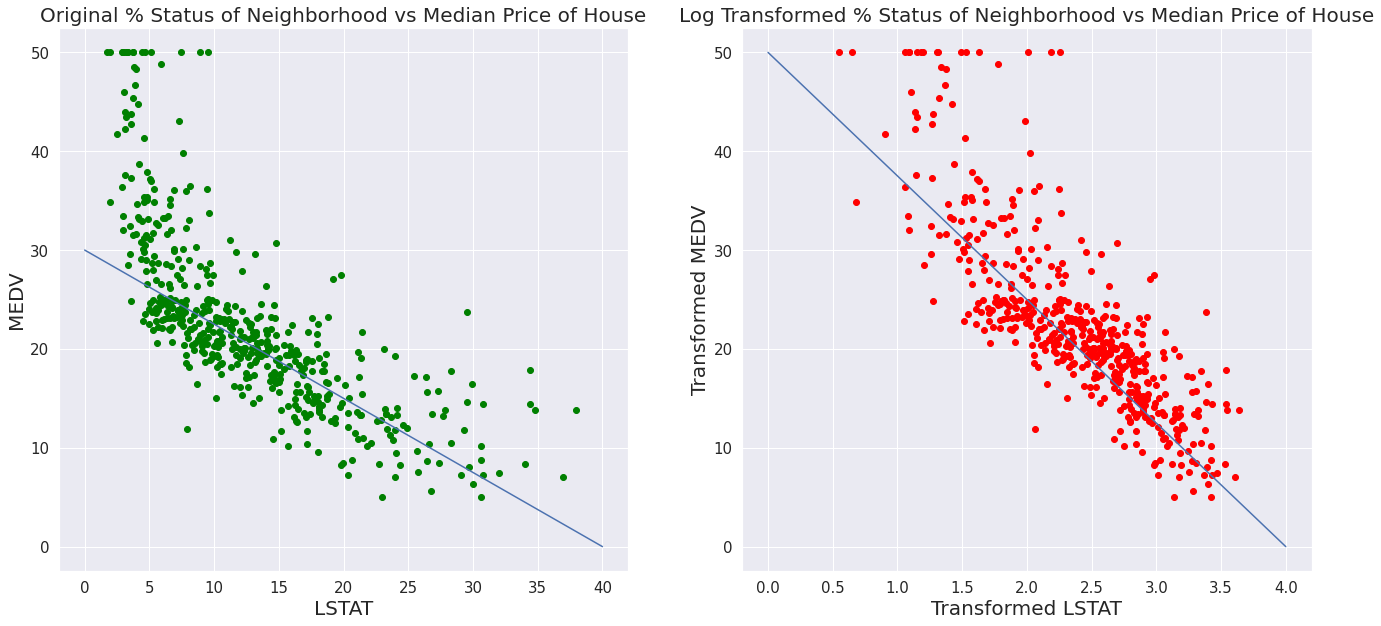

In [ ]:
import numpy as np
df3["LOGLSTAT"] = df3["LSTAT"].apply(np.log)
plt.figure(figsize=(20,10))

# showing plot 1
plt.subplot(1,2,1)
plt.scatter(df3["LSTAT"], df3['MEDV'], color='green')
plt.title('Original % Status of Neighborhood vs Median Price of House', fontsize= 20)
plt.xlabel('LSTAT',fontsize=20);
plt.ylabel('MEDV',fontsize=20);
plt.plot([0,40],[30,0])

# showing plot 2
plt.subplot(1,2,2)
plt.scatter(df3["LOGLSTAT"], df3['MEDV'], color='red')
plt.title('Log Transformed % Status of Neighborhood vs Median Price of House', fontsize= 20)
plt.xlabel('Transformed LSTAT',fontsize=20);
plt.ylabel('Transformed MEDV',fontsize=20);
plt.plot([0,4],[50,0])


#Apply global parameters
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.show()


# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

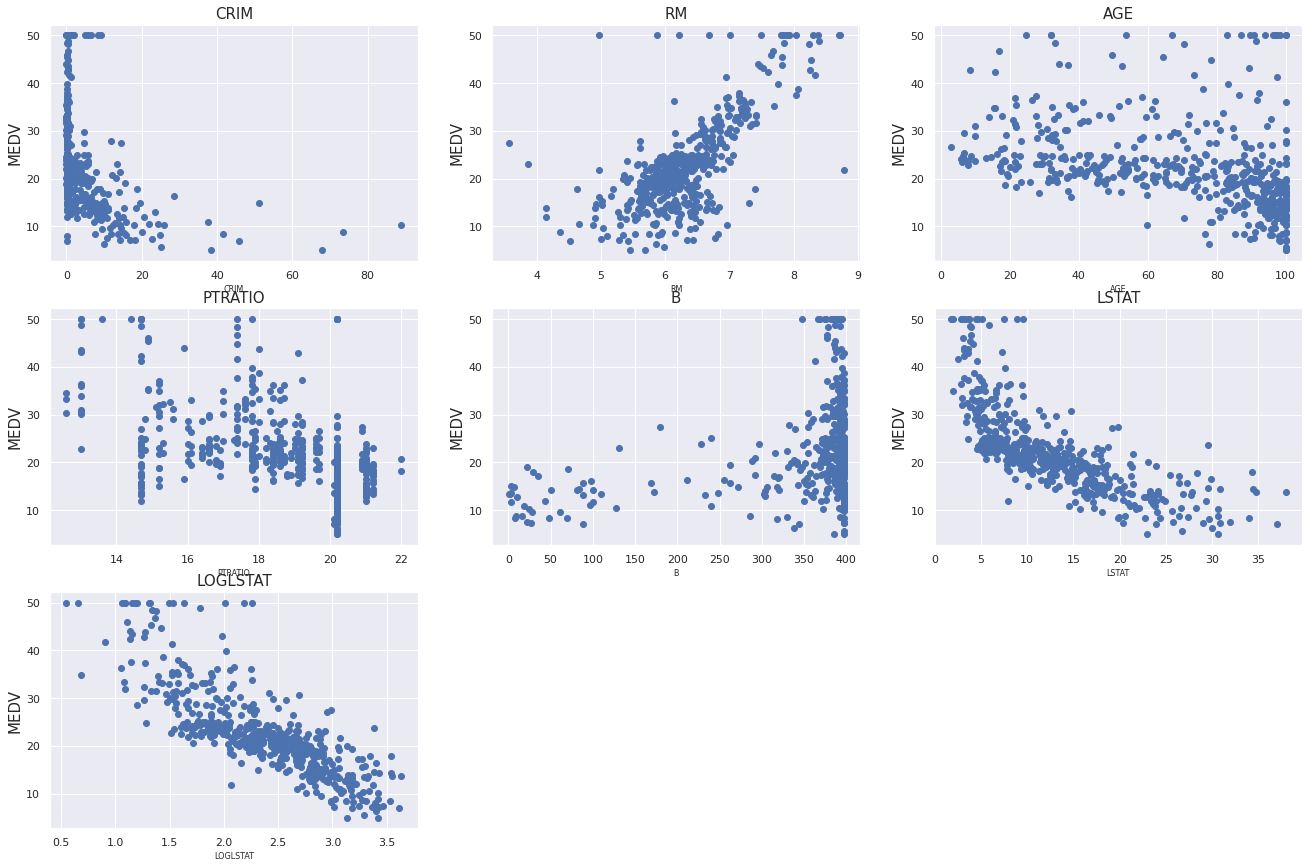

In [ ]:
#I know I don't have this one exactly right, but here's an attempt


import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

features = df3.drop('MEDV', 1).columns
target = df3['MEDV']
plt.figure(figsize=(20,20))

for index, feature_name in enumerate(features):
    # 4 rows of plots, 13/3 == 4 plots per row, index+1 where the plot begins
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(df3[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8) #Removed for easier view of plots
    plt.ylabel('MEDV', fontsize=15)